## 基本 Pandas 範例

這份筆記本將帶你了解一些非常基本的 Pandas 概念。我們將從匯入常見的資料科學庫開始：


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 系列

系列（Series）類似於列表或一維陣列，但具有索引。所有操作都會根據索引對齊。


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


其中一個常見的序列用途是**時間序列**。在時間序列中，索引具有特殊的結構——通常是一系列日期或日期時間。我們可以使用 `pd.date_range` 來創建這樣的索引。

假設我們有一個序列顯示每天購買的產品數量，並且我們知道每個星期天我們也需要為自己拿一件商品。以下是使用序列來建模的方法：


Length of index is 366


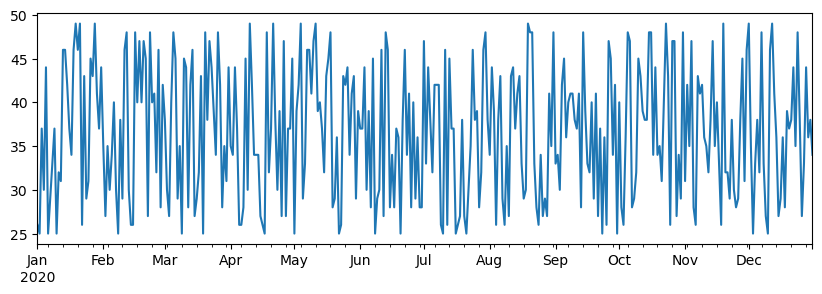

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


正如您所見，我們在這裡遇到了問題，因為在每週的序列中，未提及的日期被視為缺失值（`NaN`），而將 `NaN` 加到一個數字會得到 `NaN`。為了獲得正確的結果，我們需要在相加序列時指定 `fill_value`：


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


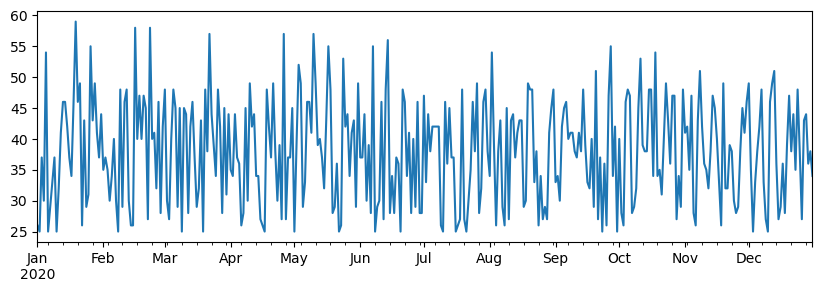

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

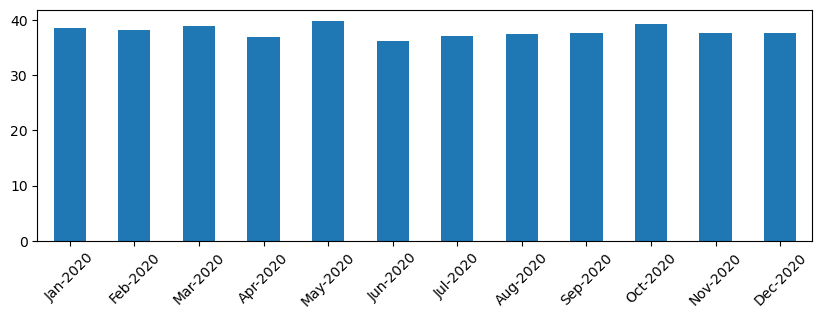

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## 資料框架 (DataFrame)

資料框架本質上是一組具有相同索引的序列。我們可以將多個序列結合在一起形成一個資料框架。給定上述定義的序列 `a` 和 `b`：


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

我們也可以使用 Series 作為列，並使用字典指定列名：


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

相同的結果可以通過轉置（然後重新命名列以匹配前面的例子）來實現：


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**從 DataFrame 中選擇列** 可以這樣完成：


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


根據篩選表達式**選擇行**:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

它的運作方式是，表達式 `df['A']<5` 會返回一個布林系列，該系列指示對於系列中的每個元素，表達式是 `True` 還是 `False`。當系列用作索引時，它會返回 DataFrame 中的行子集。因此，無法使用任意的 Python 布林表達式，例如，寫 `df[df['A']>5 and df['A']<7]` 是錯誤的。相反，你應該在布林系列上使用特殊的 `&` 運算：


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**創建新的可計算列**。我們可以通過使用直觀的表達式輕鬆為我們的 DataFrame 創建新的可計算列。以下代碼計算 A 與其平均值的偏差。


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

實際上發生的是我們正在計算一個序列，然後將這個序列賦值給左側，創建另一個列。


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

根據數字選擇行可以使用 `iloc` 結構。例如，要從 DataFrame 中選擇前 5 行：


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**分組** 常用於獲得類似於 Excel 中 *樞紐分析表* 的結果。假設我們想計算每個給定的 `LenB` 數值對應的列 `A` 的平均值。那麼我們可以按 `LenB` 對 DataFrame 進行分組，然後調用 `mean`：


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

如果我們需要計算該組的平均值和元素數量，那麼我們可以使用更複雜的 `aggregate` 函數：


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## 列印與繪圖

資料科學家經常需要探索數據，因此能夠視覺化數據是非常重要的。當 DataFrame 很大的時候，我們通常只需要確認自己是否一切操作正確，這時可以列印出前幾行來檢查。這可以透過呼叫 `df.head()` 來完成。如果你是在 Jupyter Notebook 中執行，它會以漂亮的表格形式顯示 DataFrame。


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

我們也已經看過使用 `plot` 函數來視覺化一些欄位。雖然 `plot` 在許多任務中非常有用，並且透過 `kind=` 參數支援許多不同的圖表類型，但你始終可以使用原始的 `matplotlib` 庫來繪製更複雜的內容。我們會在單獨的課程中詳細講解資料視覺化。


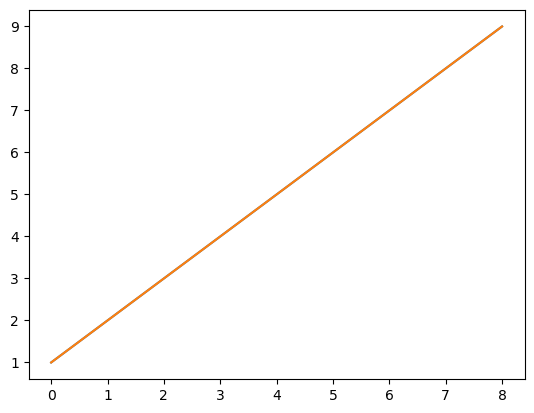

In [61]:
df['A'].plot()
plt.show()

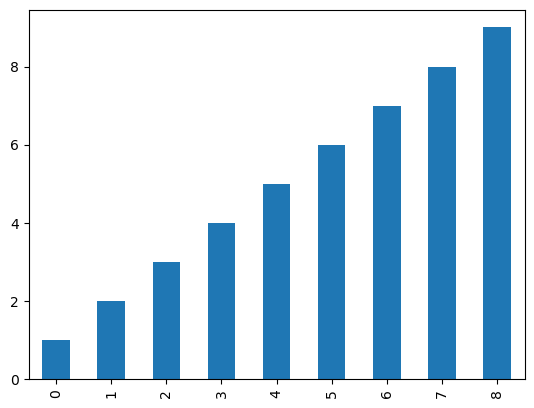

In [63]:
df['A'].plot(kind='bar')
plt.show()

本概述涵蓋了 Pandas 的大部分重要概念，但這個函式庫非常豐富，能夠實現的功能幾乎無窮無盡！現在，讓我們運用這些知識來解決具體問題吧。



---

**免責聲明**：  
此文件已使用 AI 翻譯服務 [Co-op Translator](https://github.com/Azure/co-op-translator) 進行翻譯。我們致力於提供準確的翻譯，但請注意，自動翻譯可能包含錯誤或不準確之處。應以原始語言的文件作為權威來源。對於關鍵資訊，建議尋求專業人工翻譯。我們對因使用此翻譯而引起的任何誤解或錯誤解讀概不負責。  
